# Exploratory Data Analysis - fault analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Read data file
df = pd.read_csv('lighting_data_cleaned.csv')

# Display data
df

,light_id,location_name,fault_type,timestamp,severity_level,fault_status,maintenance_cost,year,month,day,day_of_week,hour
0,L0226,Pasir Ris,Control System,2020-01-01 01:22:25,High,Acknowledged,343.60,2020,1,1,Wednesday,1
1,L0061,City Hall,Control System,2020-01-01 23:45:18,Low,In Progress,271.80,2020,1,1,Wednesday,23
2,L0455,Pasir Ris,Power-Related,2020-01-02 01:33:02,Informational,Resolved,169.20,2020,1,2,Thursday,1
3,L0924,City Hall,Cybersecurity,2020-01-02 03:34:48,Informational,Resolved,372.45,2020,1,2,Thursday,3
4,L0134,Canberra,Communication,2020-01-02 08:09:16,Low,In Progress,335.57,2020,1,2,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
461,L0835,Orchard Road,Sensor-Related,2020-12-24 23:46:51,Medium,Acknowledged,482.02,2020,12,24,Thursday,23
462,L0452,Jurong West,Environmental,2020-12-25 02:25:42,Informational,Detected,277.74,2020,12,25,Friday,2
463,L0483,Bishan,Sensor-Related,2020-12-25 02:34:36,Critical,In Progress,198.08,2020,12,25,Friday,2
464,L0683,Canberra,Control System,2020-12-29 20:00:19,Critical,In Progress,236.10,2020,12,29,Tuesday,20


In [3]:
# Summary statistics for all columns
df.describe(include='all')

,light_id,location_name,fault_type,timestamp,severity_level,fault_status,maintenance_cost,year,month,day,day_of_week,hour
count,466,466,466,466,466,466,466.000000,466.0,466.000000,466.000000,466,466.000000
unique,367,10,6,466,5,5,NaN,NaN,NaN,NaN,7,NaN
top,L0683,Bishan,Cybersecurity,2020-12-29 20:44:12,Critical,Acknowledged,NaN,NaN,NaN,NaN,Sunday,NaN
freq,4,65,86,1,105,105,NaN,NaN,NaN,NaN,75,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,277.253519,2020.0,6.270386,15.296137,NaN,11.560086
std,NaN,NaN,NaN,NaN,NaN,NaN,120.379063,0.0,3.472761,8.873197,NaN,7.209435
min,NaN,NaN,NaN,NaN,NaN,NaN,51.010000,2020.0,1.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,186.332500,2020.0,3.000000,7.000000,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,271.800000,2020.0,6.000000,16.000000,NaN,12.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,373.050000,2020.0,9.000000,23.000000,NaN,18.000000


/tmp/ipython-input-1397044674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1397044674.py:11: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


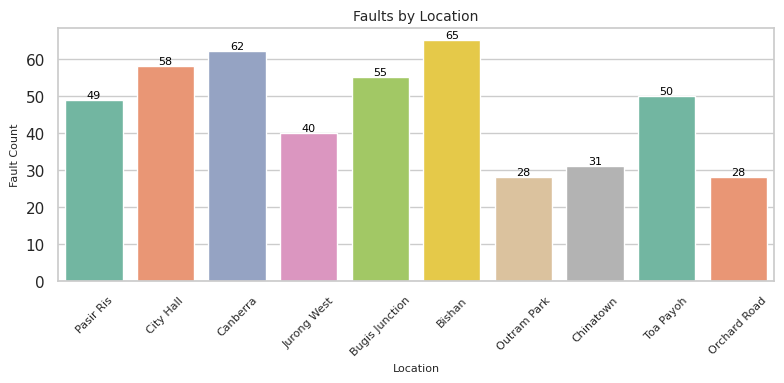

In [4]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Set chart colour
colours = sns.color_palette('Set2')

# Create a count plot
sns.countplot(
    x='location_name',
    data=df,
    palette=colours
)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=8)
# Add title and axis labels
plt.title("Faults by Location", fontsize=10)
plt.xlabel("Location", fontsize=8)
plt.ylabel("Fault Count", fontsize=8)

# Find current axes
ax = plt.gca()
# Loop through each bar
for bar in ax.patches:
    # Find the height of the current bar
    count = int(bar.get_height())
    # Find the x-position to place the text
    # bar.get_x() gives the left edge of the bar
    # bar.get_width() / 2 moves to the center of the bar
    x_pos = bar.get_x() + bar.get_width() / 2
    # Find the y-position for the text
    y_pos = bar.get_height()
    # Add text
    # va='bottom' place text above bar
    ax.text(x_pos, y_pos, str(count), fontsize=8, color='black', ha='center', va='bottom')

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

Bishan has the highest number of faults compared to other locations. On another hand, Outram Park and Orchard Road have the lowest number of recorded faults.

/tmp/ipython-input-2745749508.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


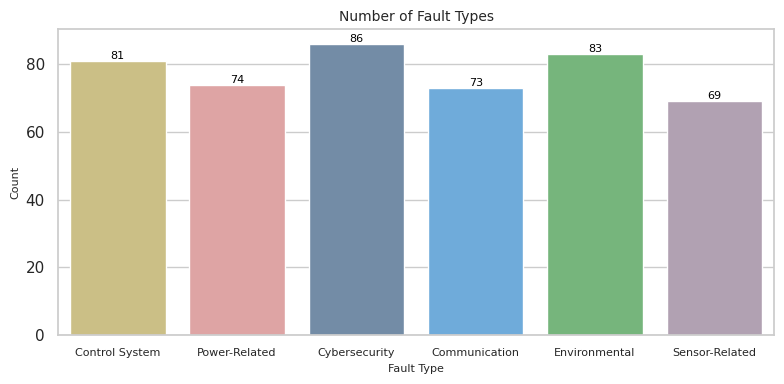

In [5]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Set chart colour
fault_type_colours = {
    'Cybersecurity': '#6A8CAF',
    'Environmental': '#6CBF73',
    'Control System': '#D6C77B',
    'Power-Related': '#E89A9A',
    'Communication': '#5DADEC',
    'Sensor-Related': '#B39EB5'
}

# Create a count plot
sns.countplot(
    x='fault_type',
    data=df,
    palette=fault_type_colours
)

# Rotate x-axis labels
plt.xticks(rotation=360, fontsize=8)
# Add title and axis labels
plt.title("Number of Fault Types", fontsize=10)
plt.xlabel("Fault Type", fontsize=8)
plt.ylabel("Count", fontsize=8)

# Find current axes
ax = plt.gca()
# Loop through each bar
for bar in ax.patches:
    # Find the height of the current bar
    count = int(bar.get_height())
    # Find the x-position to place the text
    # bar.get_x() gives the left edge of the bar
    # bar.get_width() / 2 moves to the center of the bar
    x_pos = bar.get_x() + bar.get_width() / 2
    # Find the y-position for the text
    y_pos = bar.get_height()
    # Add text
    # va='bottom' place text above bar
    ax.text(x_pos, y_pos, str(count), fontsize=8, color='black', ha='center', va='bottom')

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

The fault type with the highest occurrence is cybersecurity.

/tmp/ipython-input-429819187.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


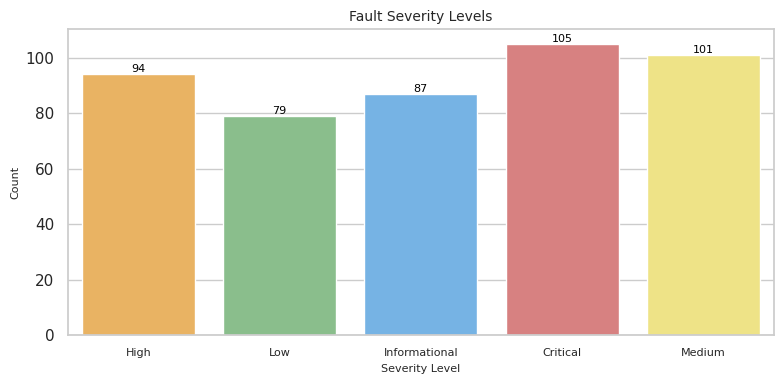

In [6]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Set chart colour
severity_level_colours = {
    'Critical': '#E57373',
    'High': '#FFB74D',
    'Medium': '#FFF176',
    'Low': '#81C784',
    'Informational': '#64B5F6'
}

# Create a count plot
sns.countplot(
    x='severity_level',
    data=df,
    palette=severity_level_colours
)

# Rotate x-axis labels
plt.xticks(rotation=360, fontsize=8)
# Add title and axis labels
plt.title("Fault Severity Levels", fontsize=10)
plt.xlabel("Severity Level", fontsize=8)
plt.ylabel("Count", fontsize=8)

# Find current axes
ax = plt.gca()
# Loop through each bar
for bar in ax.patches:
    # Find the height of the current bar
    count = int(bar.get_height())
    # Find the x-position to place the text
    # bar.get_x() gives the left edge of the bar
    # bar.get_width() / 2 moves to the center of the bar
    x_pos = bar.get_x() + bar.get_width() / 2
    # Find the y-position for the text
    y_pos = bar.get_height()
    # Add text
    # va='bottom' place text above bar
    ax.text(x_pos, y_pos, str(count), fontsize=8, color='black', ha='center', va='bottom')

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

Critical severity faults occur most frequently.

/tmp/ipython-input-2103111849.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


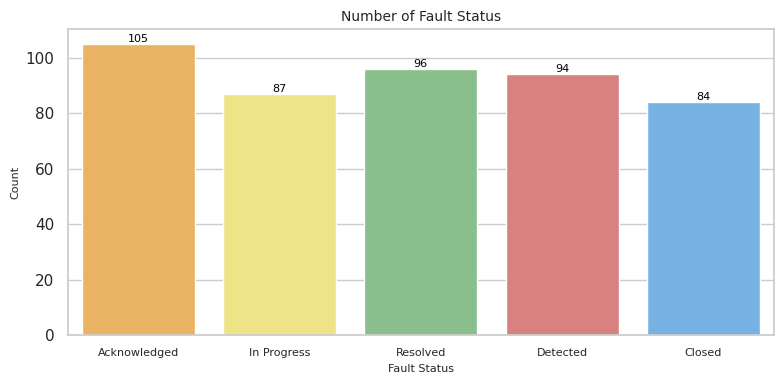

In [7]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Set chart colour
fault_status_colours = {
    'Detected': '#E57373',
    'Acknowledged': '#FFB74D',
    'In Progress': '#FFF176',
    'Resolved': '#81C784',
    'Closed': '#64B5F6'
}

# Create a count plot
sns.countplot(
    x='fault_status',
    data=df,
    palette=fault_status_colours
)

# Rotate x-axis labels
plt.xticks(rotation=360, fontsize=8)
# Add title and axis labels
plt.title("Number of Fault Status", fontsize=10)
plt.xlabel("Fault Status", fontsize=8)
plt.ylabel("Count", fontsize=8)

# Find current axes
ax = plt.gca()
# Loop through each bar
for bar in ax.patches:
    # Find the height of the current bar
    count = int(bar.get_height())
    # Find the x-position to place the text
    # bar.get_x() gives the left edge of the bar
    # bar.get_width() / 2 moves to the center of the bar
    x_pos = bar.get_x() + bar.get_width() / 2
    # Find the y-position for the text
    y_pos = bar.get_height()
    # Add text
    # va='bottom' place text above bar
    ax.text(x_pos, y_pos, str(count), fontsize=8, color='black', ha='center', va='bottom')

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

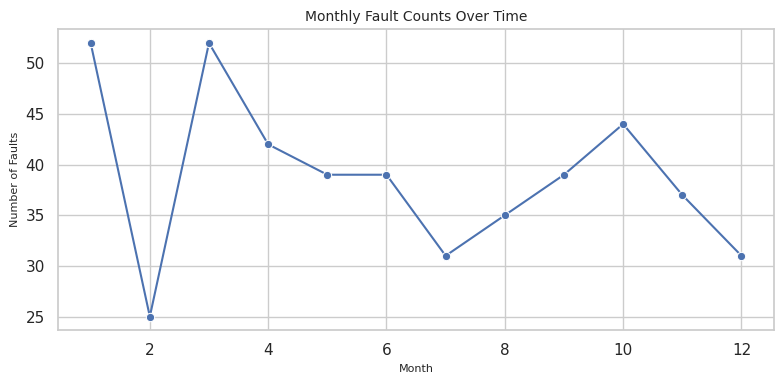

In [15]:
# Set plot style to make counts easier
sns.set_style("whitegrid")

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Group by month
monthly_fault_counts = df.groupby('month').size().reset_index(name='fault_count')

# Create a line plot
sns.lineplot(
    x='month',
    y='fault_count',
    marker='o',
    data=monthly_fault_counts
)

# Sorting months
monthly_counts = monthly_fault_counts.sort_values('month')

# Rotate x-axis labels
plt.xticks(rotation=360)
# Add title and axis labels
plt.title('Monthly Fault Counts Over Time', fontsize=10)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of Faults', fontsize=8)

# Display plot
plt.tight_layout()
plt.show()

The line chart shows monthly fault counts in 2020, with a peak in March followed by a decline mid-year and a slight rise towards year-end.

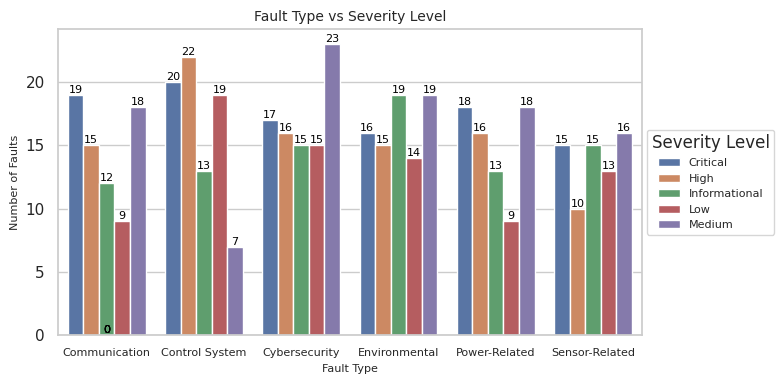

In [20]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Count faults grouped by fault type and severity level
fault_counts = df.groupby(['fault_type', 'severity_level']).size().reset_index(name='count')

# Create the barplot
sns.barplot(
    x='fault_type',
    y='count',
    hue='severity_level',
    data=fault_counts
)

# Rotate x-axis labels
plt.xticks(rotation=360, fontsize=8)
# Add title and axis labels
plt.title("Fault Type vs Severity Level", fontsize=10)
plt.xlabel("Fault Type", fontsize=8)
plt.ylabel("Number of Faults", fontsize=8)

# Move legend outside on the right
plt.legend(title='Severity Level', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# Find current axes
ax = plt.gca()
# Loop through each bar
for bar in ax.patches:
    # Find the height of the current bar
    count = int(bar.get_height())
    # Find the x-position to place the text
    # bar.get_x() gives the left edge of the bar
    # bar.get_width() / 2 moves to the center of the bar
    x_pos = bar.get_x() + bar.get_width() / 2
    # Find the y-position for the text
    y_pos = bar.get_height()
    # Add text
    # va='bottom' place text above bar
    ax.text(x_pos, y_pos, str(count), fontsize=8, color='black', ha='center', va='bottom')

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

/tmp/ipython-input-3561167104.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3561167104.py:11: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(


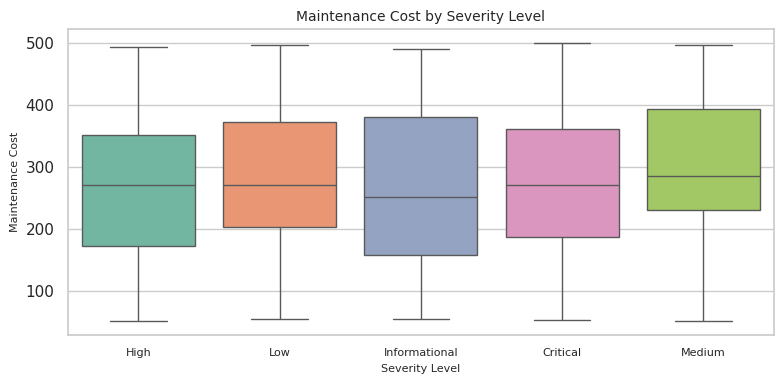

In [21]:
# Set plot style to make counts easier
sns.set(style='whitegrid')

# Create chart
plt.figure(figsize=(8, 4))  # width=8, height=4 inches

# Set color palette
colors = sns.color_palette('Set2')

# Create a box plot
sns.boxplot(
    x='severity_level',
    y='maintenance_cost',
    data=df,
    palette=colors
)

# Rotate x-axis labels
plt.xticks(rotation=360, fontsize=8)
# Add title and axis labels
plt.title("Maintenance Cost by Severity Level", fontsize=10)
plt.xlabel("Severity Level", fontsize=8)
plt.ylabel("Maintenance Cost", fontsize=8)

# Display plot
plt.tight_layout() # Adjust layout
plt.show()

In [11]:
filename='fault_eda.csv'

# Save to csv and download
df.to_csv(filename, index=False) # Save csv
files.download(filename) # Automatically download the file in colab

# Read final dataset
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,light_id,location_name,fault_type,timestamp,severity_level,fault_status,maintenance_cost,year,month,day,day_of_week,hour
0,L0226,Pasir Ris,Control System,2020-01-01 01:22:25,High,Acknowledged,343.60,2020,1,1,Wednesday,1
1,L0061,City Hall,Control System,2020-01-01 23:45:18,Low,In Progress,271.80,2020,1,1,Wednesday,23
2,L0455,Pasir Ris,Power-Related,2020-01-02 01:33:02,Informational,Resolved,169.20,2020,1,2,Thursday,1
3,L0924,City Hall,Cybersecurity,2020-01-02 03:34:48,Informational,Resolved,372.45,2020,1,2,Thursday,3
4,L0134,Canberra,Communication,2020-01-02 08:09:16,Low,In Progress,335.57,2020,1,2,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
461,L0835,Orchard Road,Sensor-Related,2020-12-24 23:46:51,Medium,Acknowledged,482.02,2020,12,24,Thursday,23
462,L0452,Jurong West,Environmental,2020-12-25 02:25:42,Informational,Detected,277.74,2020,12,25,Friday,2
463,L0483,Bishan,Sensor-Related,2020-12-25 02:34:36,Critical,In Progress,198.08,2020,12,25,Friday,2
464,L0683,Canberra,Control System,2020-12-29 20:00:19,Critical,In Progress,236.10,2020,12,29,Tuesday,20
